In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 $\newcommand{\ket}[1]{|#1\rangle}$
 $\newcommand{\ket}[1]{|#1\rangle}$



In [2]:
!pip install pylatexenc
!pip install qiskit
 # the output will be cleared after installation
from IPython.display import clear_output
clear_output()

# Shor's Algorithm for Integer Factorization

It is a quantum algorithm for composite integer factorization with polynomial time complexity developed by Peter Shor in 1994.

## PROBLEM: 
**Given an composite integer M, find its factors**

**Restatement**:
A composite integer $M = P_1^{t_1} P_2^{t_2} . . . P_n^{t_n}$ , where $P_𝑖$’s are primes and $t_i$'s are their respective powers. Decomposing M into ${ P_1, P_2, . . . P_𝑛}$ is a composite number factorization. For simplicity we use 𝑀=𝑝.𝑞

It is a difficult task to complete but easy to check. Classically, the complexity class of integer factorization problem is NP(non polynomial).

Using Quantum computation, it is included in a new complexity class called BQP(Bounded Error Quantum Polynomial). It uses Quantum Fourier Transform and Modular exponentiation by repeated squaring that increased it efficiency conpared to other classical algorithms.

![complexity compare](https://drive.google.com/uc?export=view&id=1BVhrDqWziX0w2b4xUENXwuVFagMIrdTF)

## Classical Solutions
1. Check values : 1<𝑥<𝑀 , if x exactly divides M, x is the factor, for worst case, complexity :$𝑂(𝑀)= 𝑂(2^𝑤 )$.
2. Check values : 1<𝑥<√𝑀, complexity : $𝑂(2^{𝑤/2} )$
3. Best known algorithm : General Number Field Sieve (GNFS) 
    Complexity $\mathbf{
O\left(exp\left(c(\log M )^ {\frac{1}{3}} (\log \log M)^ {\frac{2}{3}} \right)\right)}
$

## Shor’s Factoring Algorithm

Say M be a composite odd integer and $M ≠𝑝^𝑘$, for prime p
1. Choose a random number : $1<𝑥<𝑀 = 𝑝.𝑞$
2. If $GCD(𝑥, 𝑀)  ≠1$, then factor = $GCD(𝑥, 𝑀)$  where GCD  = greatest common divisor
3. If $gcd⁡(𝑥, 𝑀)=1$, find period, a of function 
    $𝑓(𝑟)= 𝑥^𝑟$  𝑚𝑜𝑑 𝑀          , $𝑟∈ℤ(𝑀)$
![periodicfunction(3,16)](https://drive.google.com/uc?export=view&id=1DAkrd7MFesSt1yH69O-mU1hdtGjErEEM)
![period_line](https://drive.google.com/uc?export=view&id=1TYzxvihnwsjun1K-Gv0BSbkYrjiV3M1J)
4. If period: a is odd or $𝑥^{𝑎/2}=−1 (𝑚𝑜𝑑𝑀)$, we restart the algorithm from step 1
5. If a is even and $𝑥^{𝑎/2}=1 (𝑚𝑜𝑑𝑀)$ then, factors of M are: 
    $𝑝=𝐺𝐶𝐷(𝑥^{𝑎/2}+1, 𝑀)$ and  $𝑞=𝐺𝐶𝐷⁡(𝑥^{𝑎/2}−1, 𝑀)$


### Example
- Let M=15 , x= 3 then GCD(3,15)=3(doesnot satisfies the necessary condition)
- Choose another x, x=11, then GCD(11,15)=1
- Compute f(r)=11^r(mod 15) for r$\leq$ (15) 
        eg, f(0)=1(mod 15)=1, f(1)=11(mod 15)=11, f(2)=121(mod 15)=1
- f(r)= 1, 11, 1 ,11 ,1 , 11, 1, 11, 1, 11, 1, 11
- We can see the period, a is 2
- Factors are $𝐺𝐶𝐷(11^{2/2}+1,15)$ and $𝐺𝐶𝐷(11^{2/2}-1,15)$= 
        𝐺𝐶𝐷(10,15)= 5, 𝐺𝐶𝐷(12,15)= 3  
- Factors= 5 and 3


One can think this is an efficient way of factoring an integer. But finding the modular exponentiation takes exponential complexity that makes it inefficient.
![modular complexity](https://drive.google.com/uc?export=view&id=1Abe27JlBuouJVOdSaNhND3WWpn4cVZm2)

f(x) =  [ 1 11  1 11  1 11  1 11  1 11  1 11  1 11  1 11]


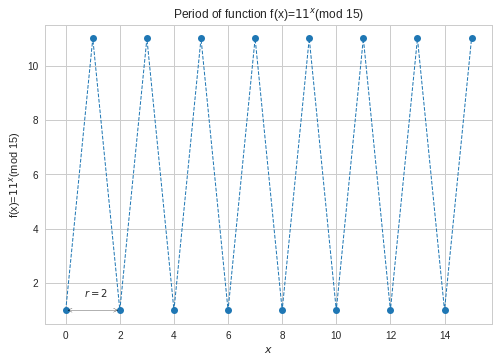

None

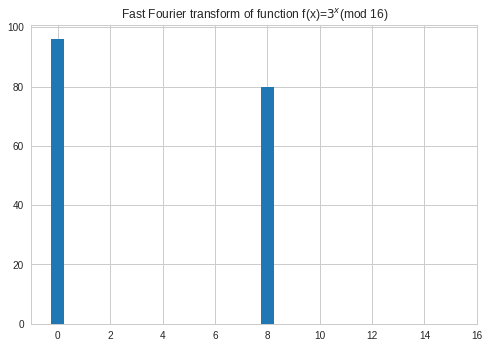

None

Period is 1/(a/N) is  2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-notebook')
from scipy.fft import fft

def periodfind(x,I,N):  #  find period a of function f(x)=x^a mod N
    arr=[]
    for i in range(N):
        f= (x**i)%(I)
        arr.append(f)
    return arr
N=16
I=15
a=11
y=np.array(periodfind(a,I,N))
x=np.arange(N)
print('f(x) = ',y)  # Values of f(x)

# plotting
plt.style.use('seaborn-whitegrid')
def plot_fig(xvals,yvals,a,I): # to make the plot nice
    yvals=list(yvals)
    fig, ax = plt.subplots()
    ax.plot(xvals, yvals, linewidth=1, linestyle='--', marker='o')
    ax.set(xlabel='$x$', ylabel='f(x)=${a}^x$(mod {I})'.format(a=a,I=I),
           title='Period of function f(x)=${a}^x$(mod {I})'.format(a=a,I=I))
    try: # plot r on the graph
        r = yvals[1:].index(1) +1 
        plt.annotate(s='', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
        plt.annotate(s='$r=%i$' % r, xy=(r/3,1.5))
    except:
        print('Could not find period, check a < N and have no common factors.')
    display(plt.show())
plot_fig(x,y,a,I)
    
z=fft(y)  #Apply Fast fourier Transform

plt.style.use('seaborn-whitegrid')
plt.title('Fast Fourier transform of function f(x)=$3^x$(mod 16)')
plt.bar(x,np.abs(z),width=0.5)
display(plt.show())
print('Period is 1/(a/N) is ',2)

## Implementation on Quantum Computer 
1. Initialize two quantum register $\ket0^n\ket1^r$
 $$ \ket{\Psi_1} = \ket{0}^n \ket{1}^r  where N=2^𝑛  :𝑀^2<𝑁 <2𝑀^2$$
2. Prepare uniform superposition by applying Hadamard gates( $H^{\otimes n} $ )in first register
$$\ket{\Psi_2} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x} \ket{1}$$
3. We apply the periodic function $𝑓(𝑥)=𝑦^𝑥 (𝑚𝑜𝑑 M)$ on second register
$$\ket{\Psi_3} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x} \ket{f(x)}$$
$$\rightarrow \ket{\Psi_3} = \frac{\hat{m}}{N} \sum_{x=0}^{a-1}(\frac{1}{\sqrt{\hat{m}}} \sum_{j=0}^{\hat{m}-1}  ) \ket{x+ja}^n \ket{f(x)}^r$$

4. Conceptually measure second qubit at $𝑓(𝑥_0 )$ and collapse superposition of 1st register(optional).
$$ \ket{\psi_4} = \frac{1}{\sqrt{\tilde{m}}} \sum_{j=0}^{\tilde{m} -1} \ket{x_0 + ja}$$

5. Apply QFT on first register to obtain the frequency of the superimposed state in 1st register
$$\ket{\Psi_5} = \frac{1}{\sqrt{\hat{m}} N } \sum_{j=0}^ {\hat{m}-1} w^{(x_0+j a)y} \ket{y}^n        = \frac{1}{\sqrt{\hat{m}} N} \sum_{y=0}^{N-1} w^{x_0 y} \sum_{j=0}^{\hat{m}-1} w^{j a y} \ket{y}^n $$

6. Measure first register to obtain different values of 𝑦.
    A set $\{y_c\}_{c=0}^{\hat{m}+1}$ is more likely to be measured than others, such that each $y_c$ associated with $\{\frac{c}{a}\}_{c=0}^{a-1}$

![shor circuit](https://www.researchgate.net/profile/Archimedes_Pavlidis/publication/228102587/figure/fig1/AS:614166725423132@1523440166758/High-level-diagram-of-Shors-algorithm-Upper-register-consists-of-2n-qubits-and-holds.png)

7. Apply Continued Fraction algorithm on $𝑦_𝑐/𝑁$  to determine 𝑐/𝑎 (Classical)

8. Use Euclidean algorithm to find 
$$\frac{1}{a}=𝐺𝐶𝐷(\{\frac{c}{a}\}_{𝑐=0}^{𝑎−1} )$$

9. Determine period(a). Then find factors classically



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import IBMQ
# Importing standard Qiskit libraries and configuring account
from qiskit.compiler import transpile, assemble
# Loading your IBM Q account(s)
# provider = IBMQ.load_account() # uncomment to run on quantum computerr

In [ ]:
import numpy as np
import math
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_hinton
from qiskit import Aer

def measure(circuit,n,c):
    for i in range(n):
        circuit.measure(i,i)
    return circuit

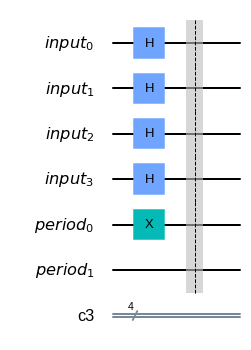

In [ ]:
pi = np.pi
qc_q = QuantumRegister(4, 'input') #Initialize the Working Register
qc_c = QuantumRegister(2, 'period') #Initialize the Control Register
c = ClassicalRegister(4) #Register which will eventually hold measurements
Shor = QuantumCircuit(qc_q, qc_c,c)

Shor.x(4) # It is common convention to add a not gate before Modular Exponentiation
Shor.h(qc_q[0:4]) #Initialize 4 Hadamard Gates to allow for all possibilities
Shor.barrier()
Shor.draw('mpl')

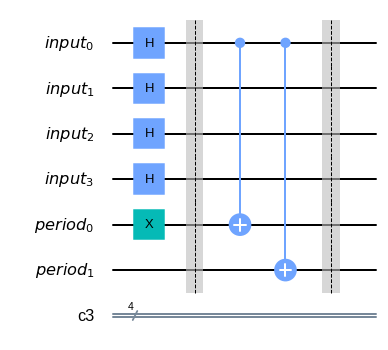

In [ ]:
#This is a compiled version of modular exponentiation that will not generalize outside of fermat primes.
Shor.cx(qc_q[0],qc_c[0]) 
Shor.cx(qc_q[0],qc_c[1])
Shor.barrier()
Shor.draw(output='mpl')

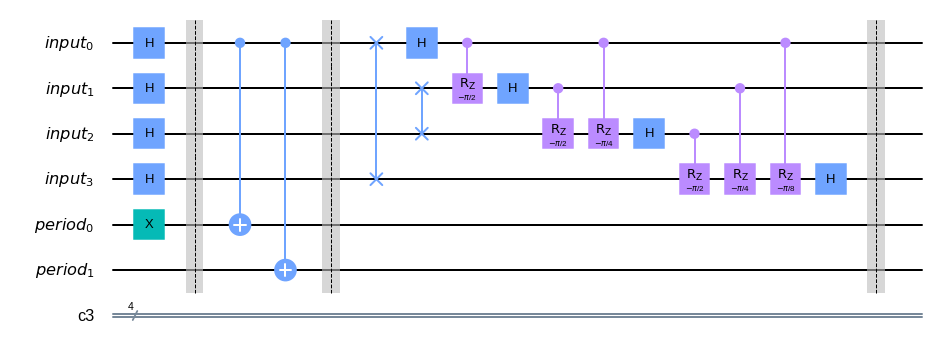

In [ ]:
#This can be ommited by classically swapping the order of measurments if noise is an issue.
Shor.swap(qc_q[0],qc_q[3])
Shor.swap(qc_q[1],qc_q[2])

#The Inverse Quantum Fourier Transform
Shor.h(0)
Shor.crz(-pi/2,qc_q[0],qc_q[1])
Shor.h(1)

Shor.crz(-pi/2,qc_q[1],qc_q[2])
Shor.crz(-pi/4,qc_q[0],qc_q[2])
Shor.h(2)

Shor.crz(-pi/2,qc_q[2],qc_q[3])
Shor.crz(-pi/4,qc_q[1],qc_q[3])
Shor.crz(-pi/8,qc_q[0],qc_q[3])
Shor.h(3)

Shor.barrier()
Shor.draw(output='mpl')

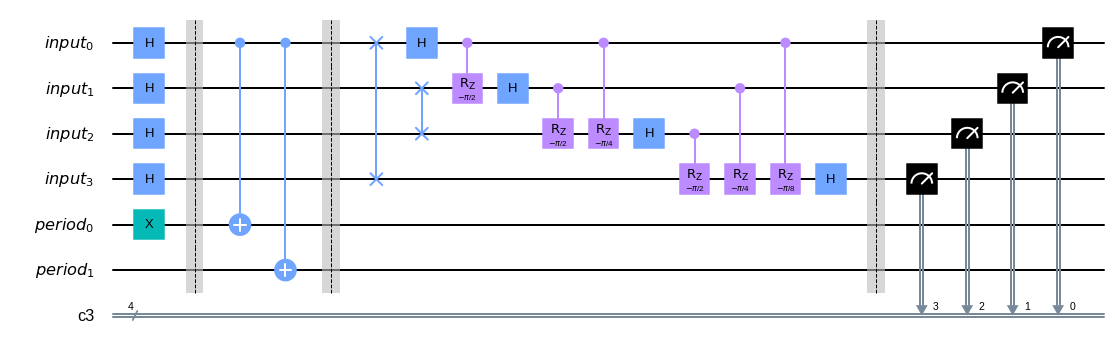

In [ ]:
#Measure Working Register
Shor.measure(qc_q[3],3)
Shor.measure(qc_q[2],2)
Shor.measure(qc_q[1],1)
Shor.measure(qc_q[0],0)

Shor.draw(output='mpl')

   Input register  input_reg_value period register  period_reg_value
0           0000'                0             01'                 1
1           0001'                1             10'                 2
2           0010'                2             01'                 1
3           0011'                3             10'                 2
4           0100'                4             01'                 1
5           0101'                5             10'                 2
6           0110'                6             01'                 1
7            0111                7             10'                 2
8           1000'                8             01'                 1
9           1001'                9             10'                 2
10          1010'               10             01'                 1
11          1011'               11             10'                 2
12          1100'               12             01'                 1
13          1101'               13

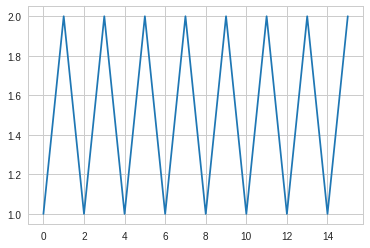

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/QC-project/SHor code/shor_format_15_11.csv")
print(df.head(16))
plt.plot(df["input_reg_value"],df["period_reg_value"])
plt.show()

In [ ]:
# # Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
# provider = IBMQ.get_provider(hub='ibm-q')
# from qiskit.providers.ibmq import least_busy
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= N 
#                                        and not x.configuration().simulator 
#                                        and x.status().operational==True))
# print("least busy backend: ", backend)

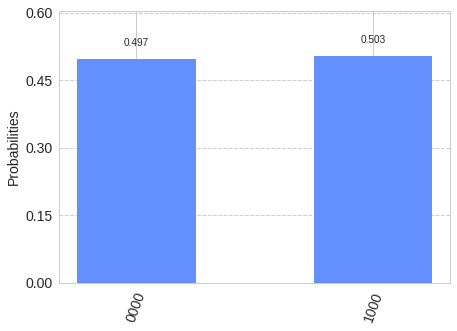

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
# backend = provider.get_backend("ibmq_16_melbourne") # to run in the actual quantum computer

# Replace simulator in execute function with 'backend' to run on a quantum computer
job = execute(Shor, simulator, shots=8192)
result = job.result()
counts = result.get_counts(Shor)
plot_histogram(counts)

In [ ]:
output=[]
for keys in list(counts.keys()):
  output.append(int(keys,2))
print('The values with maximum probabilities are: {}'.format(output))

The values with maximum probabilities are: [0, 8]


### Running it on quantum computer gives the result:
![shor_format_prime](![complexity compare](https://drive.google.com/uc?export=view&id=1P18ApPhtqnsd0jmn-NgaKlJCrch_J8k7)

We can clearly see **'0'** and **'8'** has the maximum probabilities, but we also see probabilites of other values too, unlike when ran on simulator. This is due to the noises in the quantum computer.

In [ ]:
# Classical analysis of result(classical)
print(output)
y_over_N=[out/N for out in output[1:] ]
print('y over N is',y_over_N)

[0, 8]
y over N is [0.5]


In [ ]:
def find_period(output):
    y_over_N=[out/N for out in output[1:] ]
    from fractions import Fraction
    temp=[]
    num=len(y_over_N)
    for i in range(num):
        temp.append(Fraction(y_over_N[i]).limit_denominator(N))
        temp[i]=Fraction(temp[i].denominator,temp[i].numerator)
    return temp[i].numerator

In [ ]:
a= find_period(output)
print('The period of the function is ',a)

The period of the function is  2


- Factors are $𝐺𝐶𝐷(11^{2/2}+1,15)$ and $𝐺𝐶𝐷(11^{2/2}-1,15)$= 
        𝐺𝐶𝐷(10,15)= 5, 𝐺𝐶𝐷(12,15)= 3  
- Factors= 5 and 3

In [ ]:
# find factors by taking GCD
from math import gcd
factors=[]

if (a/2)-(a//2)==0: # test if (a/2) is integer
    p=int(a/2)
    factors.append(gcd(11**p+1,15))
    factors.append(gcd(11**p-1,15))                  
print(factors)

[3, 5]


In [ ]:
# General Implementation of Shor's Algorithm
# Using Qiskit library
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Shor

In [ ]:
n=63  # n is the number to be factored.
factors= Shor(n)  # Shor() is a function in qiskit.aqua.algorithms that performs shor's algorithm

simulator = Aer.get_backend('qasm_simulator')
result_dict = factors.run(QuantumInstance(simulator))
result = result_dict['factors']
result


[[7, 9]]

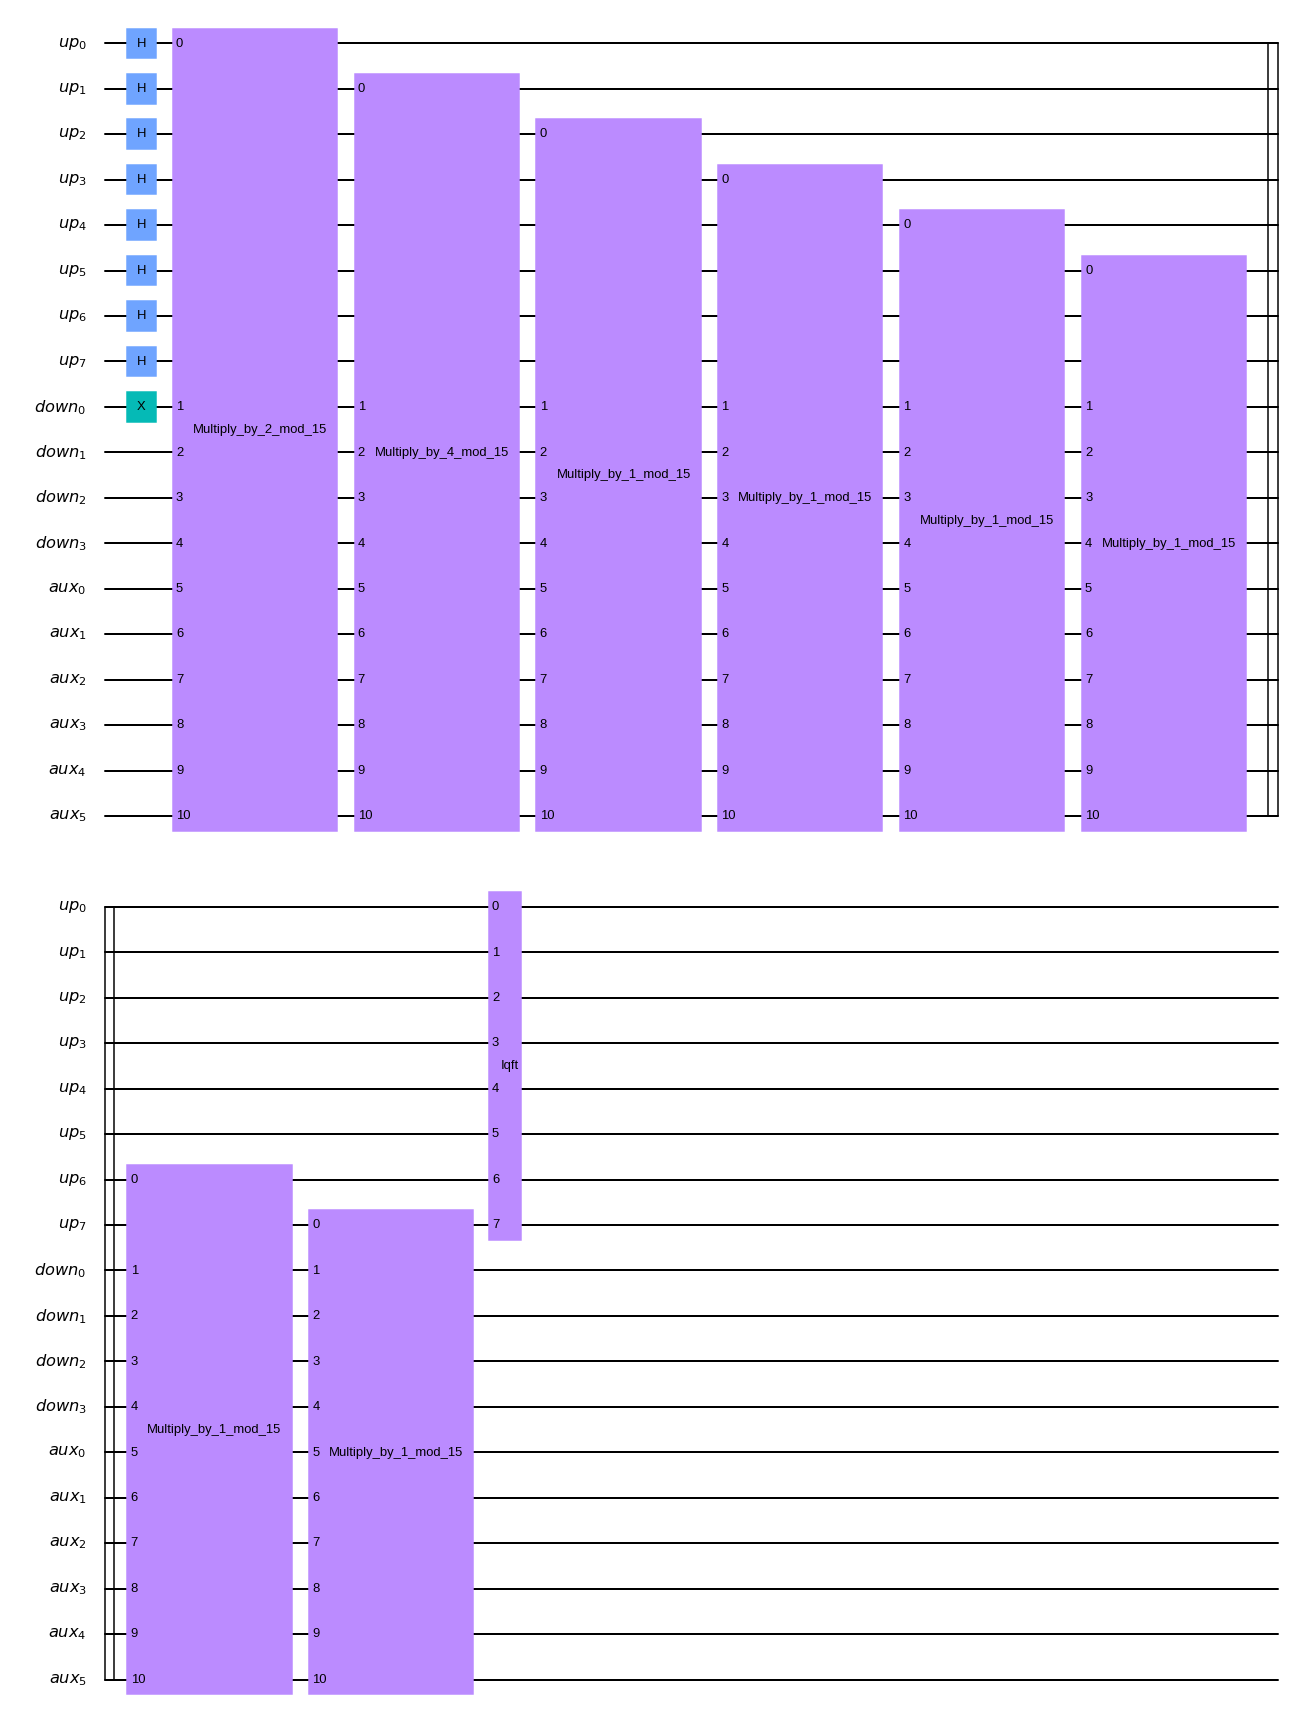

In [ ]:
qc_shor=factors.construct_circuit()
qc_shor.draw('mpl')

## Applications: RSA Cryptosystem Breaking
### Introduction:
Securing information transmission and communication by scrambling(encryption) and unscrambling(decryption) the information or signal using a key(cipher) is cryptography. RSA cryptography is a public-key cryptosystem. Public key cryptography uses two keys: a public key and a private key.  Alice encrypts the message using a public key which is available publicly and sends it to Bob.  The private key associated with the public key is used to decrypt the message.

RSA cryptosystem is one of the first public-key cryptographic systems. It was developed by Ronald Rivert, Adi Shamir, and Leonard Adleman in 1977. It is based on the difficulty of the prime factorization problem. This cryptosystem is used in different web browsers, emails, banking transactions, and for secured communication. It is implemented in many cryptographic libraries like OpenSSL, wolfCrypt, and others.

### Working
1. Take a large composite integer I with prime decomposition $I=p.q$.
2. Determine 'a' such that $GCD(a,(p-1)(q-1))=1$
        public key = (a, I)
3. Say 'm' be the message(binary), Alice prepare encrypted message 's' such that
  $$c=m^a\: mod\: I$$
4. Bob generates a private key using public keys and factors of I. Determine b such that  $$ a.b \: mod\: (p-1)(q-1)$$
5. Bob uses the private key: K=(b, N) to decrypt the message.
  $$m= c^b\: mod\: I$$
        
### Conclusion
If an integer can be factored easily, RSA cryptography can be broken. But The largest RSA number to be factored till now is RSA-250, which is a 250 digit long number with 829 bits. It took roughly 2700 core-years, using Intel Xeon Gold 6130. Almost all currently used RSA cryptosystem uses 1024 bit or larger numbers like RSA-2048 and RSA-4096

Example of a RSA-2048:
![rs12048](https://drive.google.com/uc?export=view&id=1vtjxG1AnSCs-mOzyMmtWCI8w7CCB3hMk)

Shor's factoring algorithm pose a threat to RSA cryptosystem. Researchers argue a 2018 bit key that takes 300 trillion years for a classical computer to break, can be broken by a for 4099 qubit quantum computer in about 10 seconds. But, the largest number yet factored by a quantum computer using Shor's algorithm is 21 because of errors and limitations of qubits.

## References
1. Michael A Nielsen and Isaac Chuang.Quantum computation and quantuminformation.  Cambridge University Press, 2002
2. Michael Loceff.  A course in quantum computing, vol1, 2015
3. https://doi.org/10.1038/srep03023
4. https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.Shor.html
5. https://quantumcomputinguk.org/tutorials/shors-algorithm-with-code
6. https://github.com/Nhwagner/Public/blob/master/Shor's.ipynb

In [3]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.7.0',
 'qiskit-aqua': '0.8.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-terra': '0.16.0'}